In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np


db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "2004",
                            database = "ecommerce")


cur = db.cursor()

# 1. List all unique cities where customers are located.

In [2]:


query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()

data
# df = pd.DataFrame(data)
# df.head()

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# 2. Count the number of orders placed in 2017.

In [12]:
query = """ select count( order_id) from orders where year(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()

data[0][0]

90202

# 3. Find the  top 10 category by  sales.

C:\Users\91905\AppData\Local\Temp\ipykernel_18952\4067635097.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x="Category", y="Sales", data=df , palette=c)


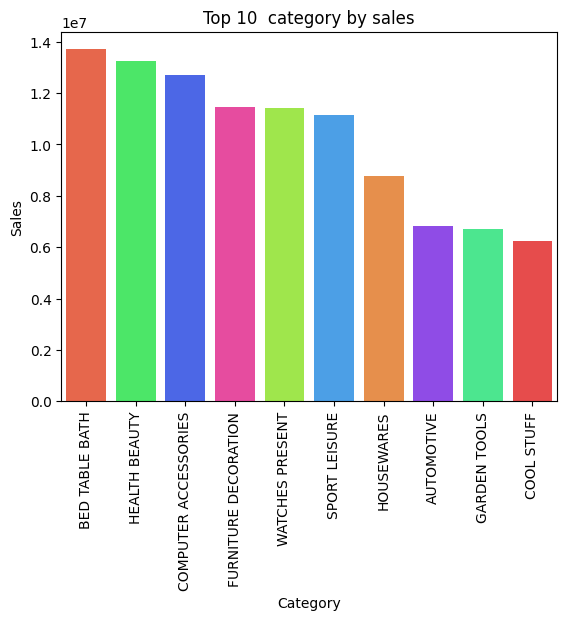

In [72]:
query = """ 
select upper(products.product_category) category , round(sum(payments.payment_value),2) as paymentsa
from payments join order_items on payments.order_id = order_items.order_id
join products on products.product_id = order_items.product_id
group by category order by paymentsa desc limit 10

"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns =["Category","Sales"])

c = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#A1FF33', '#33A1FF', '#FF8C33', '#8C33FF', '#33FF8C', '#FF3333']
bar_plot = sns.barplot(x="Category", y="Sales", data=df , palette=c)
plt.xticks(rotation=90)
plt.title("Top 10  category by sales")
plt.show()


# 4. Calculate the percentage of orders that were paid in installments.

In [5]:
query = """ 
select (sum(case when payment_installments then 1 else 0 end)/count(*))*100 from payments
"""

cur.execute(query)
data = cur.fetchall()
data

[(Decimal('99.9981'),)]

# 5. Count the number of customers from each state. 

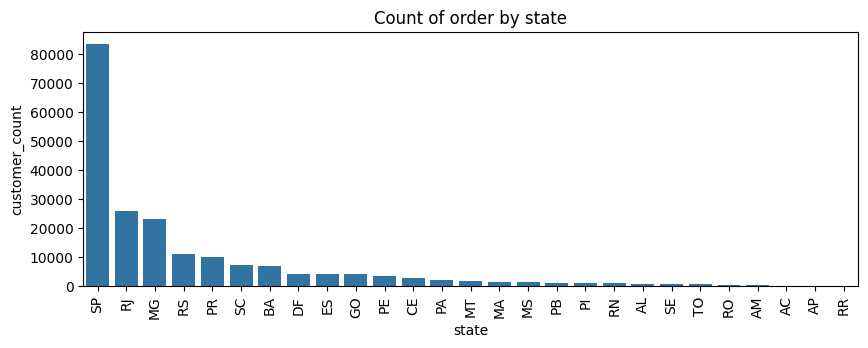

,state,customer_count
0,SP,83492
1,RJ,25704
2,MG,23270
3,RS,10932
4,PR,10090
5,SC,7274
6,BA,6760
7,DF,4280
8,ES,4066
9,GO,4040


In [71]:
query = """ 
SELECT customer_state , count(customer_id) as customer FROM customers group by customer_state order by customer desc;
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data , columns =["state","customer_count"])
df = df.sort_values(by = "customer_count" , ascending = False)

plt.figure(figsize = (10,3.3))
sns.barplot(x = "state" ,y = "customer_count"  ,data = df)
plt.xticks(rotation = 90)
plt.title("Count of order by state")
plt.show()
df

# 6 Calculate the number of orders per month in 2018.


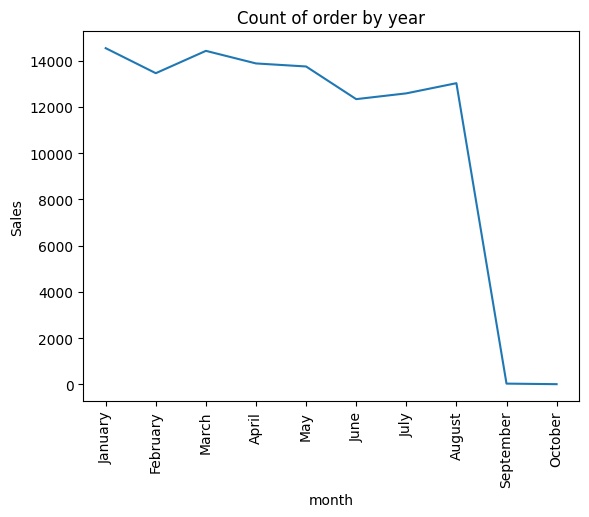

,month,Sales
0,January,14538
1,February,13456
2,March,14422
3,April,13878
4,May,13746
5,June,12334
6,July,12584
7,August,13024
8,September,32
9,October,8


In [73]:
query = """
SELECT 
    months, 
    order_count
FROM (
    SELECT 
        MONTHNAME(order_purchase_timestamp) AS months, 
        COUNT(order_id) AS order_count,
        MONTH(order_purchase_timestamp) AS monthnum
    FROM 
        orders 
    WHERE 
        YEAR(order_purchase_timestamp) = 2018 
    GROUP BY 
        months, monthnum
) AS monthly_orders
ORDER BY 
    monthnum;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data ,  columns =["month","Sales"])
sns.lineplot(data= df, x = "month", y = "Sales" )
plt.xticks(rotation=90)
plt.title("Count of order by year")
plt.show()
df

# 7  Find the average number of products per order, grouped by customer city.


In [7]:

query = """
with a as(select orders.order_id , orders.customer_id,  count(order_items.order_item_id) as nikhil from order_items join orders on  orders.order_id = order_items.order_id  
group by orders.order_id , orders.customer_id)
select customers.customer_city ,round(avg(a.nikhil),2) from a join customers on a.customer_id = customers.customer_id group by customers.customer_city

"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1
0,sao jose dos campos,4.55
1,indaial,4.46
2,treze tilias,5.09
3,sao paulo,4.62
4,rio de janeiro,4.59
...,...,...
4105,aurora do para,4.00
4106,nova america,4.00
4107,tibau do sul,4.00
4108,lagoa da canoa,4.00


# 8 Calculate the percentage of total revenue contributed by each product category.

In [8]:
query = """

select upper(products.product_category) , round((round(sum(payments.payment_value),2) / (select sum(payment_value) from payments))*100,2)  from products join order_items on order_items.product_id = products.product_id join payments on
payments.order_id = order_items.order_id group by products.product_category

"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1
0,PERFUMERY,12.66
1,FURNITURE DECORATION,35.73
2,TELEPHONY,12.17
3,FASHION BAGS AND ACCESSORIES,5.45
4,BED TABLE BATH,42.79
...,...,...
69,CDS MUSIC DVDS,0.03
70,LA CUISINE,0.07
71,FASHION CHILDREN'S CLOTHING,0.02
72,PC GAMER,0.05


# 9 Identify the correlation between product price and the number of times a product has been purchased.

In [9]:
query = """
select products.product_category , count(order_items.product_id) sellTime , round(avg(order_items.price),2) price
from products join order_items on products.product_id = order_items.product_id group by products.product_category
"""

cur.execute(query)
data =  cur.fetchall()
df = pd.DataFrame(data , columns= ["Category","Order_count","price"])
# df
arr1 = df["Order_count"]
arr2 = df["price"]
a = np.corrcoef([arr1,arr2])
print(a[0],a[1])


[ 1.         -0.10631514] [-0.10631514  1.        ]


# 10 Calculate the total revenue generated by each seller, and rank them by revenue.


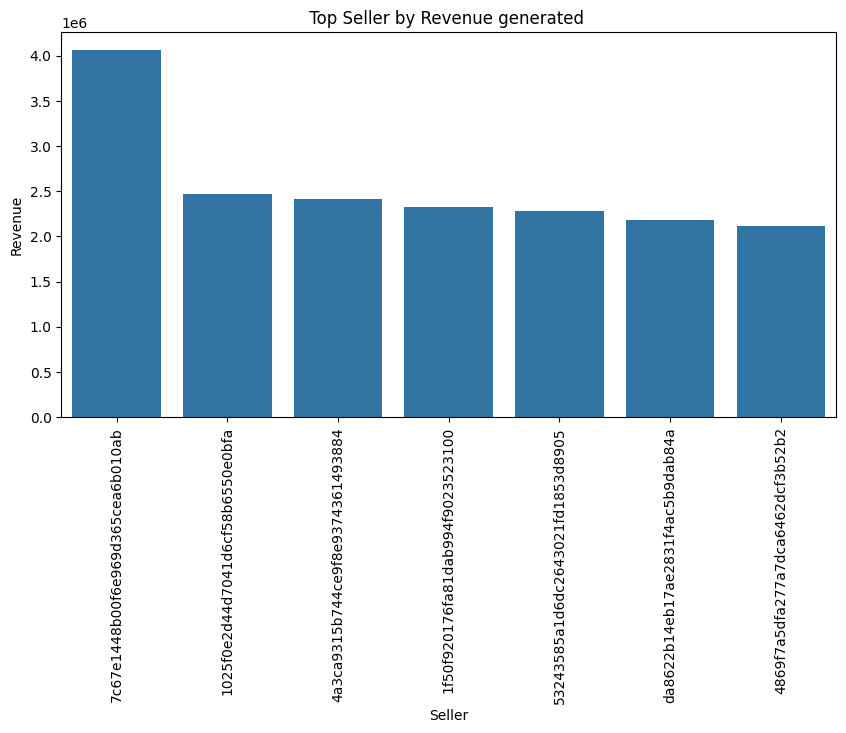

In [81]:
query = """
select *  , rank() over(order by income desc) as ranks from 
(
select sellers.seller_id , round(sum(payments.payment_value),2) as income  from sellers join order_items on order_items.seller_id = sellers.seller_id 
join payments on order_items.order_id = payments.order_id group by sellers.seller_id
) as a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Seller" , "Revenue" , "Renk"])
df = df.head(7)
plt.figure(figsize = (10,5))
sns.barplot(x = "Seller", y = "Revenue" , data = df)
plt.title(" Top Seller by Revenue generated  ")
plt.xticks(rotation = 90)
plt.show()


# 11 Calculate the moving average of order values for each customer over their order history.

In [61]:
query = """
select customer_id , order_purchase_timestamp , avg(payment_value) over(partition by customer_id order by order_purchase_timestamp  rows between 2 preceding and current row) as moving_avg from 
(select orders.customer_id , orders.order_purchase_timestamp , payments.payment_value 
from orders join payments on orders.order_id = payments.order_id) as a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["customer" ,"time" ,"moving_avg"])
df

,customer,time,moving_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.410004
...,...,...,...
415539,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.500000
415540,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.370001
415541,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.370001
415542,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.370001


#  12 Calculate the cumulative sales per month for each year. 

In [60]:
query = """
select years , months , payment , sum(payment) over(order by years , months) as comunative_sales from
(select year(orders.order_purchase_timestamp) as years , month(orders.order_purchase_timestamp) as months, round(sum(payments.payment_value),2)  as payment from orders 
join payments on orders.order_id = payments.order_id group by years, months order by years, months) as a
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["year" ,"month","avg" ,"moving_avg"])
df

,year,month,avg,moving_avg
0,2016,9,1008.96,1008.96
1,2016,10,236361.92,237370.88
2,2016,12,78.48,237449.36
3,2017,1,553952.16,791401.52
4,2017,2,1167632.04,1959033.56
5,2017,3,1799454.40,3758487.96
6,2017,4,1671152.12,5429640.08
7,2017,5,2371675.28,7801315.36
8,2017,6,2045105.52,9846420.88
9,2017,7,2369531.68,12215952.56


# 13 Calculate the year-over-year growth rate of total sales.

In [12]:
query = """
with a as(
select year(orders.order_purchase_timestamp) as years , 
round(sum(payments.payment_value),2) revenue
from orders join payments 
on payments.order_id = orders.order_id  group by years order by years)
select years , round((revenue-back)/back,6) * 100 from
(select years ,revenue , lag(revenue ,1) over(order by years) back  from a)  as b
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["year", "yoy"])
df


,year,yoy
0,2016,NaN
1,2017,12112.7038
2,2018,20.0009


# 14 Identify the top 3 customers who spent the most money in each year.

C:\Users\91905\AppData\Local\Temp\ipykernel_18952\3286875491.py:15: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x= "customer_id", y = "payment",data = df , hue= "year",palette=palette)


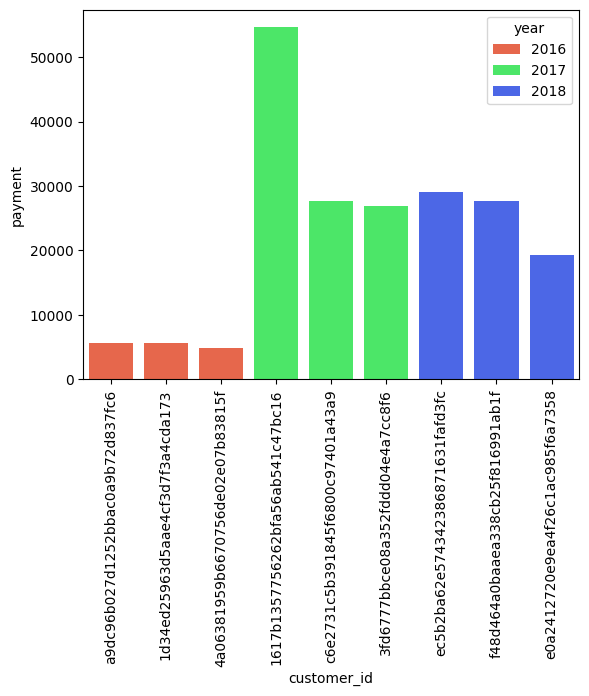

In [83]:
query ="""

select customer_id , years , money , ranks from
(select customer_id , money , dense_rank() over(partition by years order by money desc) as ranks, years from
(select orders.customer_id , year(orders.order_purchase_timestamp) as years , round(sum(payments.payment_value),2) as money
  from orders join payments on orders.order_id = payments.order_id group by orders.customer_id , year(orders.order_purchase_timestamp) order by money  desc) as c) as d where ranks <= 3

"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data ,columns = ["customer_id","year","payment","rank"])

palette = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#A1FF33']
sns.barplot(x= "customer_id", y = "payment",data = df , hue= "year",palette=palette)
plt.xticks(rotation = 90)
plt.show()